In [4]:
import carla
import math
import random
import time
import matplotlib.pyplot as plt

In [5]:
#client=carla.Client('localhost',2000)
dt=0.01
world=carla.Client('localhost',2000).get_world()

In [6]:
bp_lib=world.get_blueprint_library()
spawn_points=world.get_map().get_spawn_points()

coords=[]
for i in spawn_points:
    x=i.location.x
    y=i.location.y
    z=i.location.z
    coords.append([x,y,z])

location=carla.Location(x=-64.64484405517578, y=24.471010208129883, z=0.5999999642372131)
rotation=carla.Rotation(pitch=0,yaw=0,roll=0)
transform=carla.Transform(location,rotation)

location2=carla.Location(x=-73, y=24.471010208129883, z=0.5999999642372131)
rotation2=carla.Rotation(pitch=0,yaw=0,roll=0)
transform2=carla.Transform(location2,rotation2)

location3=carla.Location(x=-88, y=24.471010208129883, z=0.5999999642372131)
rotation3=carla.Rotation(pitch=0,yaw=0,roll=0)
transform3=carla.Transform(location3,rotation3)

vehicle_bp1=bp_lib.find('vehicle.lincoln.mkz_2020')
vehicle_bp2=bp_lib.find('vehicle.lincoln.mkz_2020')
vehicle_bp3=bp_lib.find('vehicle.lincoln.mkz_2020')

vehicle=world.try_spawn_actor(vehicle_bp1,transform)
vehicle2=world.try_spawn_actor(vehicle_bp2,transform2)
vehicle3=world.try_spawn_actor(vehicle_bp3,transform3)

spectator=world.get_spectator()
transform1=carla.Transform(vehicle3.get_transform().transform(carla.Location(x=-4,z=2.5)),vehicle3.get_transform().rotation)
spectator.set_transform(transform1)


In [7]:
def saturate(x):
    if x>1:
        return 1
    elif x<-1:
        return -1
        #return 0
    else:
        return x

In [8]:
vehicle.set_target_velocity(carla.Vector3D(6, 0, 0))
vehicle2.set_target_velocity(carla.Vector3D(1, 0, 0))
vehicle3.set_target_velocity(carla.Vector3D(1, 0, 0))
E1=[]
E2=[]
V1=[]
V2=[]
V3=[]
A2=[]
A3=[]
B2=[]
B3=[]
T=[]

ddef=10
kp=1
ki=0.00
kd=500
t=time.time()
I1=0
I2=0
e1_prev=0
e2_prev=0
t2=0
b2=0
t3=0
b3=0
tgap=1
while time.time()-t <35:
    
    '''
    #disturbance given to lead vehicle
     if(time.time()-t>10 and time.time()-t<11):
        vehicle.apply_control(carla.VehicleControl(0.5,0,0))
    '''
   
        
    x1=vehicle.get_transform().location.x
    x2=vehicle2.get_transform().location.x
    x3=vehicle3.get_transform().location.x
    drel1=x1-x2
    drel2=x2-x3
    
    v1=vehicle.get_velocity().x
    v2=vehicle2.get_velocity().x
    v3=vehicle3.get_velocity().x   
    dsafe2 = ddef + (tgap*v2)
    dsafe3 = ddef + (tgap*v3)
    ts=time.time()-t
    T.append(ts)
    
    e1=drel1-dsafe2
    e2=drel2-dsafe3
    
    E1.append(e1)
    E2.append(e2)
    
    
    I1=I1+e1*dt
    I2=I2+e2*dt
    
    de1=e1-e1_prev
    de2=e2-e2_prev
 
    
    a2=saturate(kp*e1 + ki*I1)
    a3=saturate(kp*e2 + ki*I2)
    
    V1.append(v1)
    V2.append(v2)
    V3.append(v3)
    A2.append(a2)
    A3.append(a3)
    
    if (a2>=0):
        a2=a2
        b2=0
    else:
        b2 = abs(a2)
        a2=0
                
    if (a3>=0):
        a3=a3
        b3=0
    else:
        b3 = abs(a3)
        a3=0
                
    B2.append(b2)
    B3.append(b3)
    
    vehicle2.apply_control(carla.VehicleControl(a2,0,b2))
    vehicle3.apply_control(carla.VehicleControl(a3,0,b3))

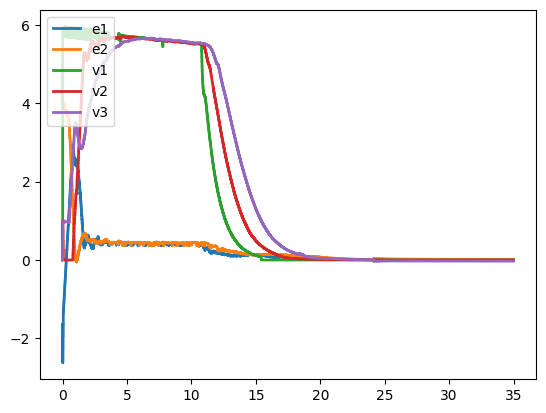

In [9]:
fig, ax = plt.subplots()
ax.plot(T, E1, linewidth=2.0)
ax.plot(T, E2, linewidth=2.0)
ax.plot(T, V1, linewidth=2.0)
ax.plot(T, V2, linewidth=2.0)
ax.plot(T, V3, linewidth=2.0)
#plt.ylim(0,2)
plt.legend(["e1", "e2","v1","v2","v3"], loc ="upper left")
plt.show()

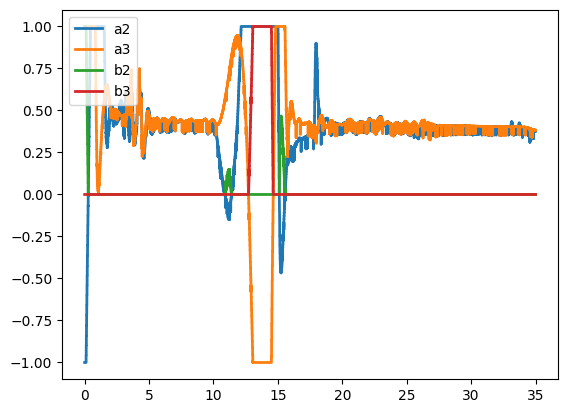

In [7]:
fig, ax = plt.subplots()
ax.plot(T, A2, linewidth=2.0)
ax.plot(T, A3, linewidth=2.0)
ax.plot(T, B2, linewidth=2.0)
ax.plot(T, B3, linewidth=2.0)
plt.legend(["a2", "a3", "b2", "b3"], loc ="upper left")
plt.show()

In [14]:
j=0
for i in range(0,len(T)):
    if T[i]>2:
        j=i
        break

In [16]:
print(max(E1[j:]))
print(max(E2[j:]))

0.6022882461547852
0.5335221290588379


In [ ]:
'''

    
    #print("e1 ",e1,"e2 ",e2,"Target1 ",kp*e1,"Target2 ",kp*e2,"actual ",v2,v3)
'''
'''
while True:

    x1=vehicle.get_transform().location.x
    x2=vehicle2.get_transform().location.x
    x3=vehicle3.get_transform().location.x
    drel1=x1-x2
    drel2=x2-x3

    ts=time.time()-t
    T.append(ts)

    e1=drel1-dsafe 
    e2=drel2-dsafe

    E1.append(e1)
    E2.append(e2)

    v2=vehicle2.get_velocity().x
    v3=vehicle3.get_velocity().x

    dv2=kp*e1*dt
    dv3=kp*e2*dt

    v2=v2+dv2
    v3=v3+dv3

    vehicle2.set_target_velocity(carla.Vector3D(v2, 0, 0))
    vehicle3.set_target_velocity(carla.Vector3D(v3, 0, 0))



    V2.append(v2)
    V3.append(v3)

    world.tick()
    
    if(time.time()-t > 15):
        break

'''

   #print(de1,de2)
    '''
    dv2=kp*e1*dt+ ki*I1*dt +kd*de1
    dv3=kp*e2*dt+ ki*I2*dt +kd*de2
    e1_prev=e1
    e2_prev=e2
    
    v2=v2+dv2
    v3=v3+dv3
    
    vehicle2.set_target_velocity(carla.Vector3D(v2, 0, 0))
    vehicle3.set_target_velocity(carla.Vector3D(v3, 0, 0))
    
    
    '''
